In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [3]:
#read csv
df = pd.read_csv('Cafe_Data_MRA.csv')

# Convert Date and Time columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Date'] = pd.to_datetime(df['Date'])

# Add columns for day of week, hour, month
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour
df['Month'] = df['DateTime'].dt.month_name()

# 1. Overall Data Overview
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
 10  DateTime      145830 non-null  datetime64[ns]
 11  DayOfWeek     145830 non-null  object        
 12  Hour          145830 non-null  int32         
 13  Month         145830 non-null  object        
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(6)
memo

In [31]:
df.dtypes

Date            datetime64[ns]
Bill Number             object
Item Desc               object
Time                    object
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
DateTime        datetime64[ns]
DayOfWeek               object
Hour                     int32
Month                   object
dtype: object

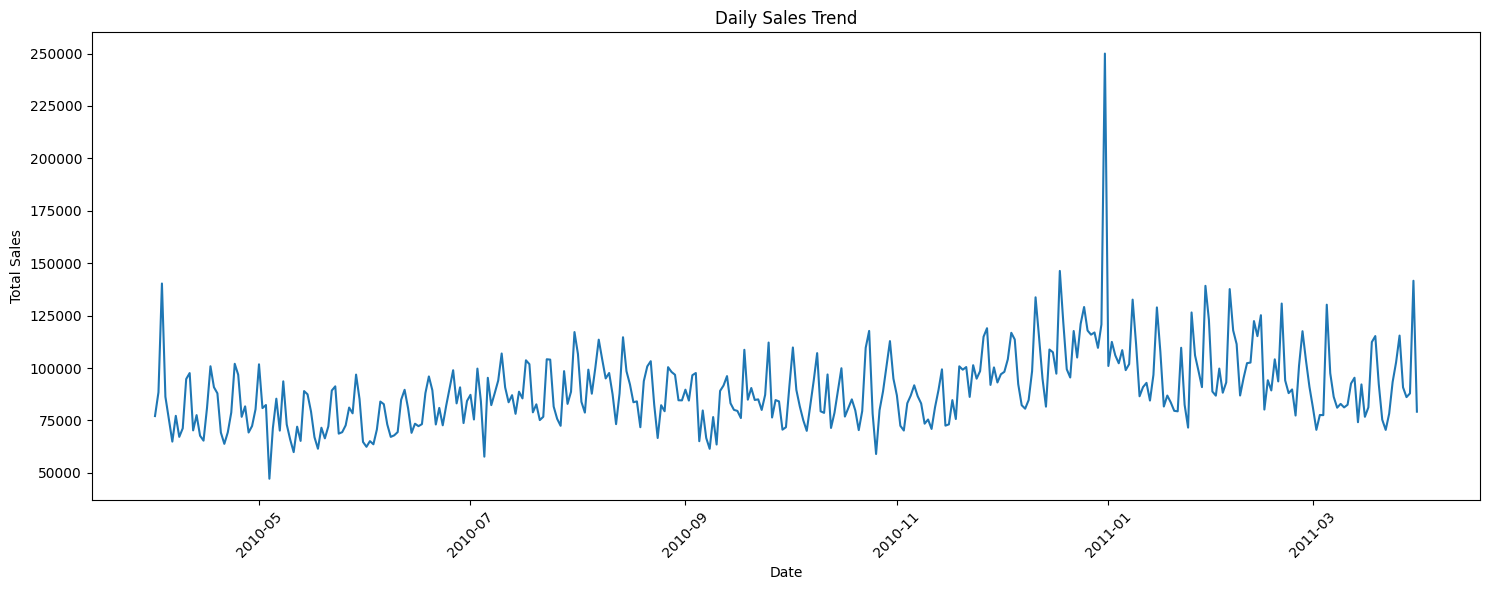

In [28]:
# 2. Sales Trends
# Daily sales trend
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



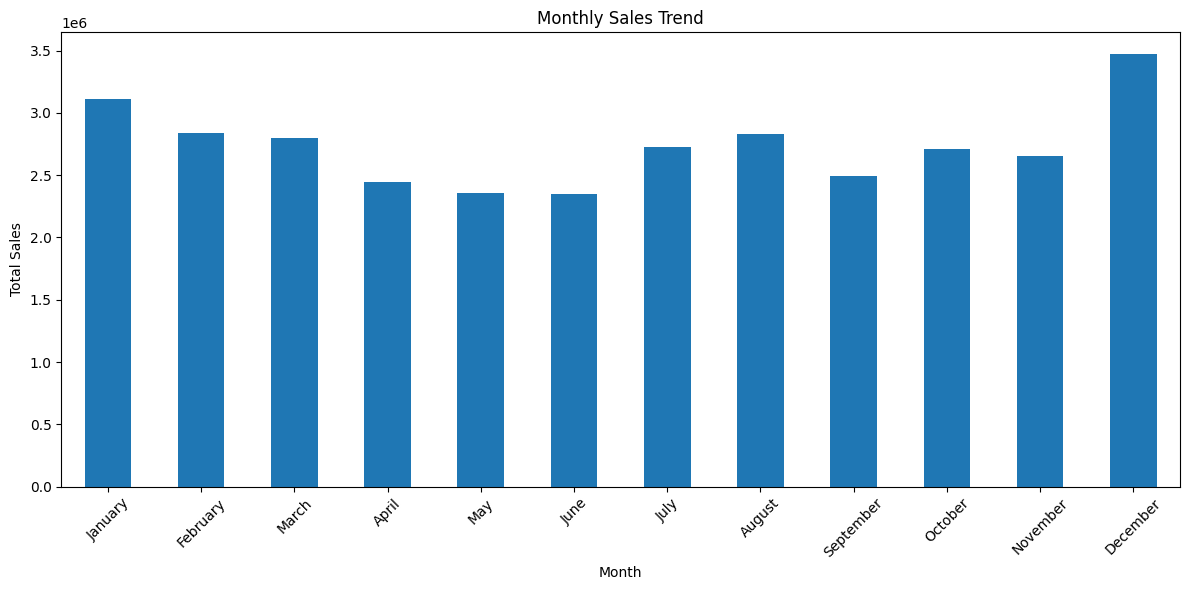

In [5]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Total'].sum()
month_order = list(calendar.month_name)[1:]
monthly_sales = monthly_sales.reindex(month_order)
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



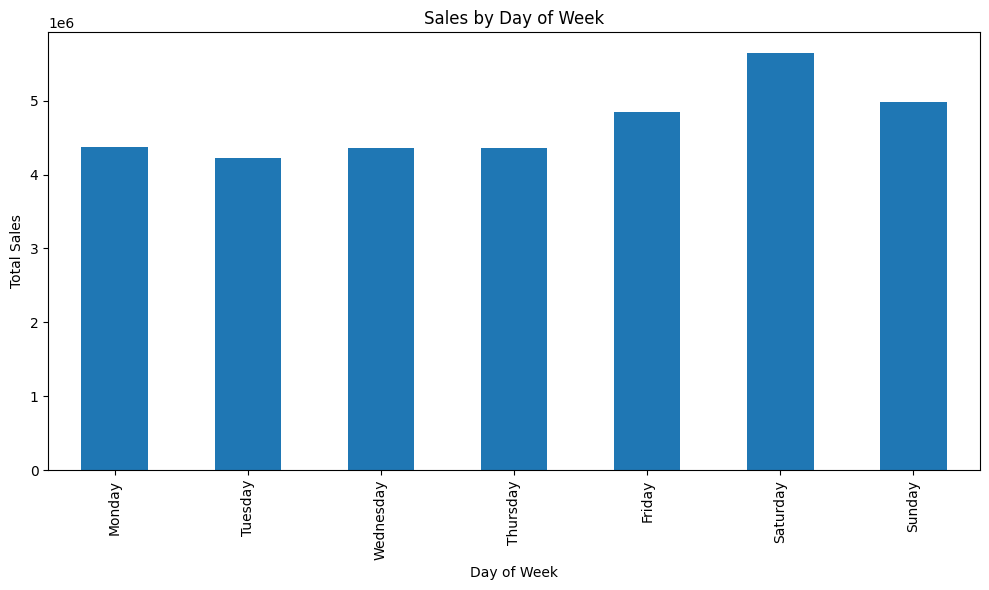

In [6]:
# 3. Consumer Behavior Analysis
# Sales by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('DayOfWeek')['Total'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



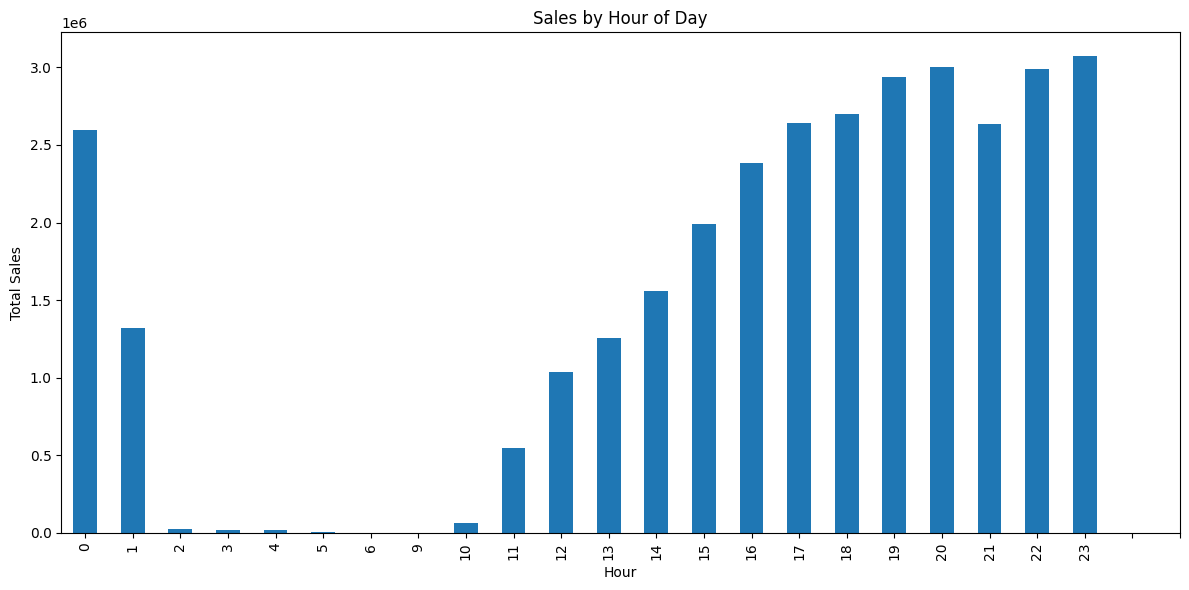

In [7]:
# Sales by hour of day
sales_by_hour = df.groupby('Hour')['Total'].sum()
plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



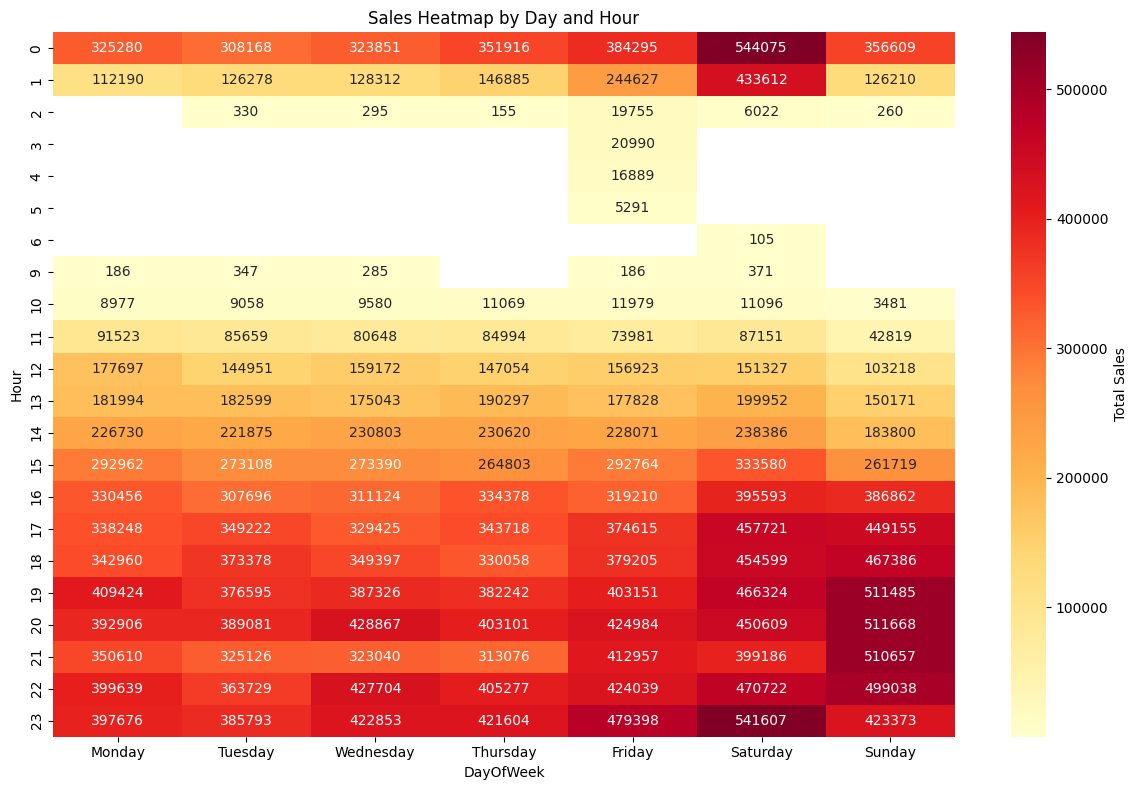

In [8]:
# Heatmap of sales by day and hour
pivot = df.pivot_table(values='Total', index='Hour', columns='DayOfWeek', aggfunc='sum')
pivot = pivot.reindex(columns=day_order)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Total Sales'})
plt.title('Sales Heatmap by Day and Hour')
plt.tight_layout()
plt.show()



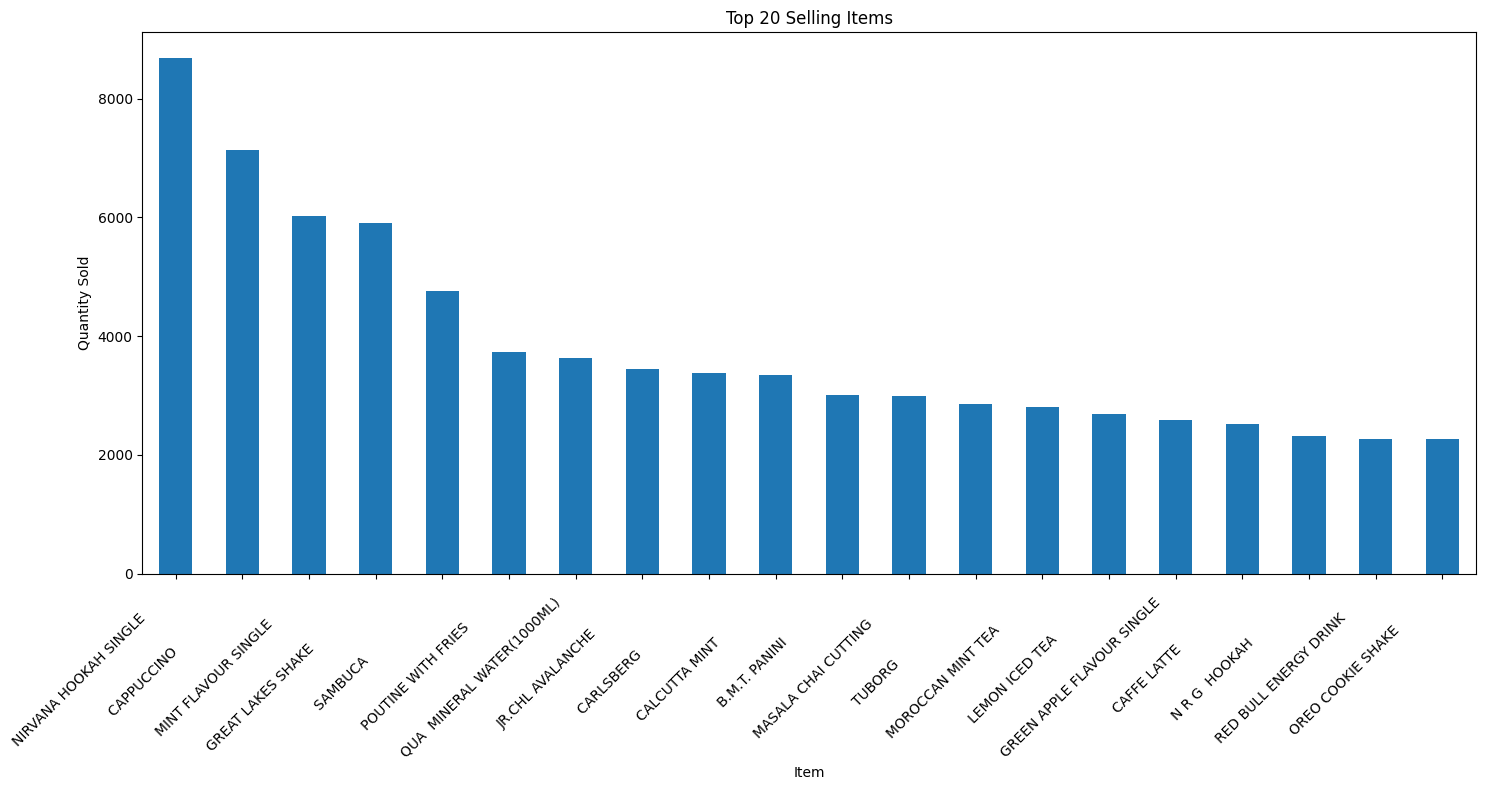

In [9]:
# 4. Menu Item Analysis
# Top 20 selling items
top_items = df.groupby('Item Desc')['Quantity'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15, 8))
top_items.plot(kind='bar')
plt.title('Top 20 Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



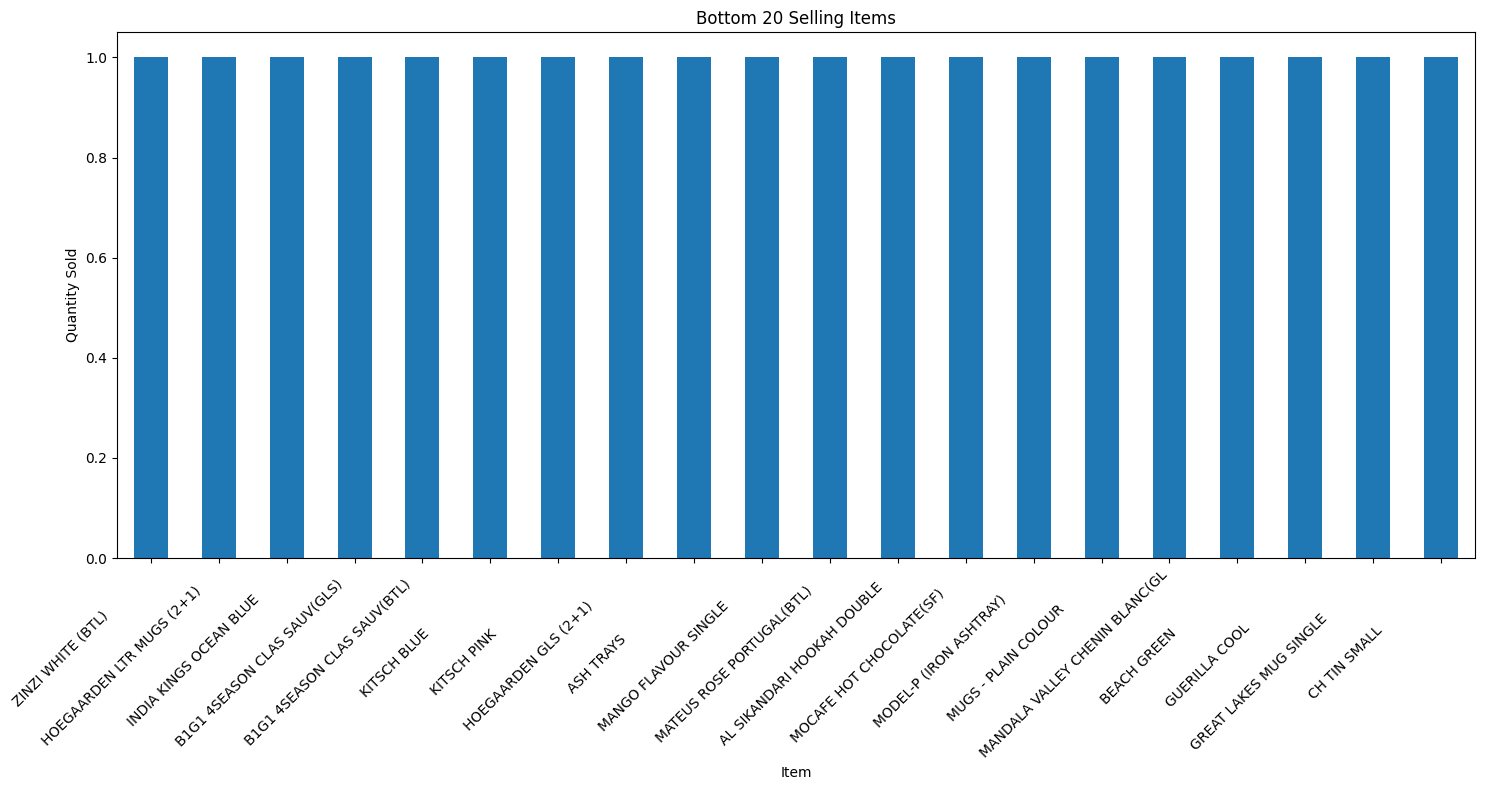

In [10]:
# Bottom 20 selling items
bottom_items = df.groupby('Item Desc')['Quantity'].sum().sort_values().head(20)
plt.figure(figsize=(15, 10))
bottom_items.plot(kind='bar')
plt.title('Bottom 20 Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



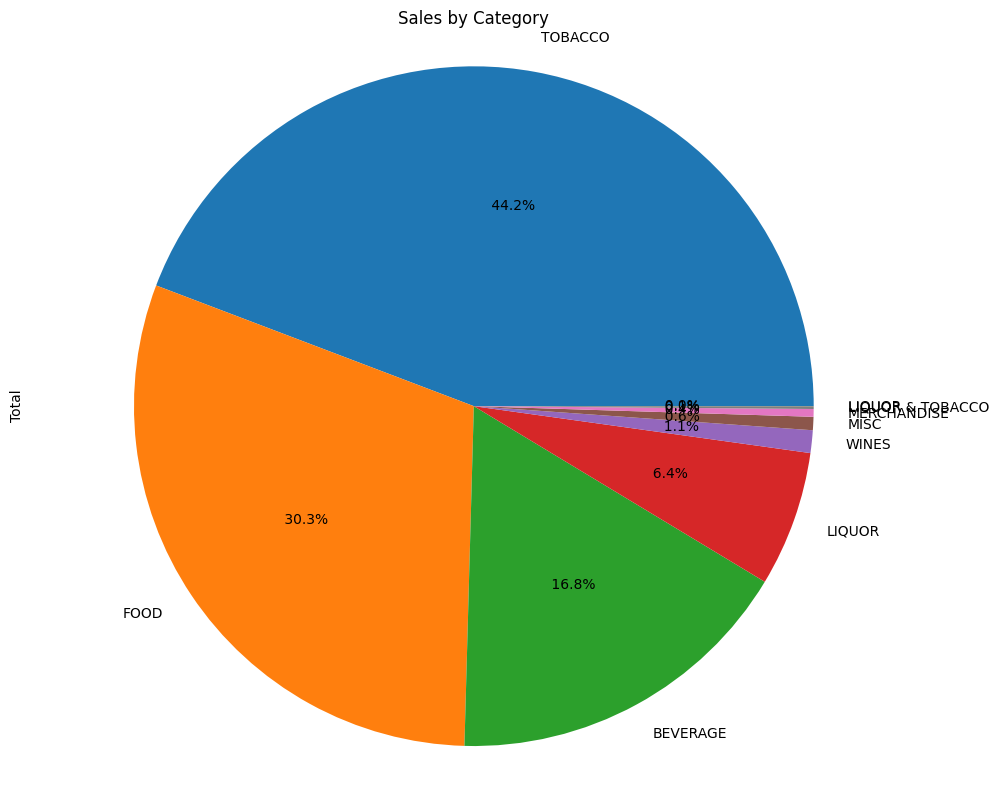

In [30]:
# 5. Category Analysis
# Sales by category
sales_by_category = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sales_by_category.plot(kind='pie', autopct='%5.1f%%')
plt.title('Sales by Category')
plt.axis('equal')
plt.tight_layout()
plt.show()



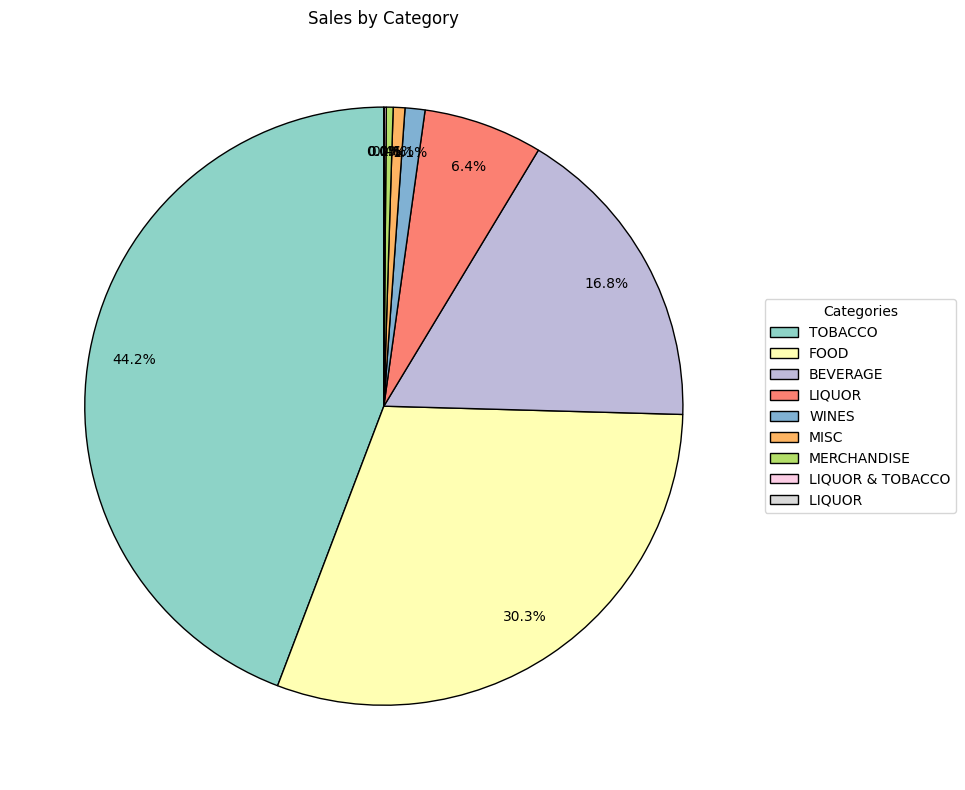

In [5]:
import matplotlib.pyplot as plt

# Sales by category
sales_by_category = df.groupby('Category')['Total'].sum().sort_values(ascending=False)

# Define a color palette for better aesthetics
colors = plt.get_cmap('Set3').colors

# Plot the pie chart with enhancements
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sales_by_category, 
                                   autopct='%1.1f%%', 
                                   colors=colors, 
                                   startangle=90, 
                                   wedgeprops={'edgecolor': 'black'},
                                   pctdistance=0.85)

# Ensure the category labels do not overlap by positioning them outside the pie
plt.legend(wedges, sales_by_category.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Make the chart circular for aesthetics
plt.gca().set_aspect('equal')

# Title and layout adjustments
plt.title('Sales by Category')
plt.tight_layout()

# Display the pie chart
plt.show()


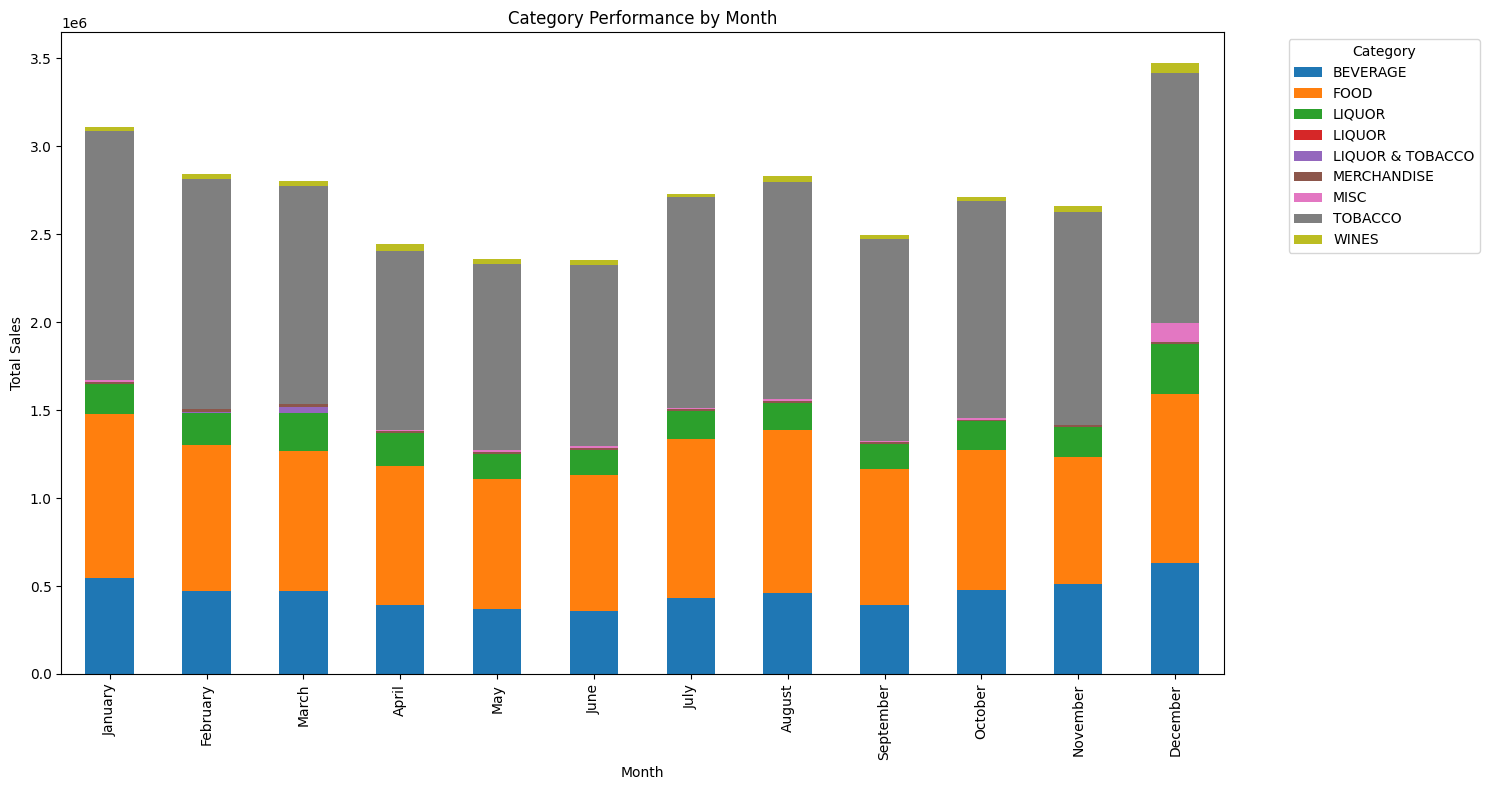

In [12]:
# Category performance over months
category_month_sales = df.groupby(['Month', 'Category'])['Total'].sum().unstack()
category_month_sales = category_month_sales.reindex(month_order)
category_month_sales.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Category Performance by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



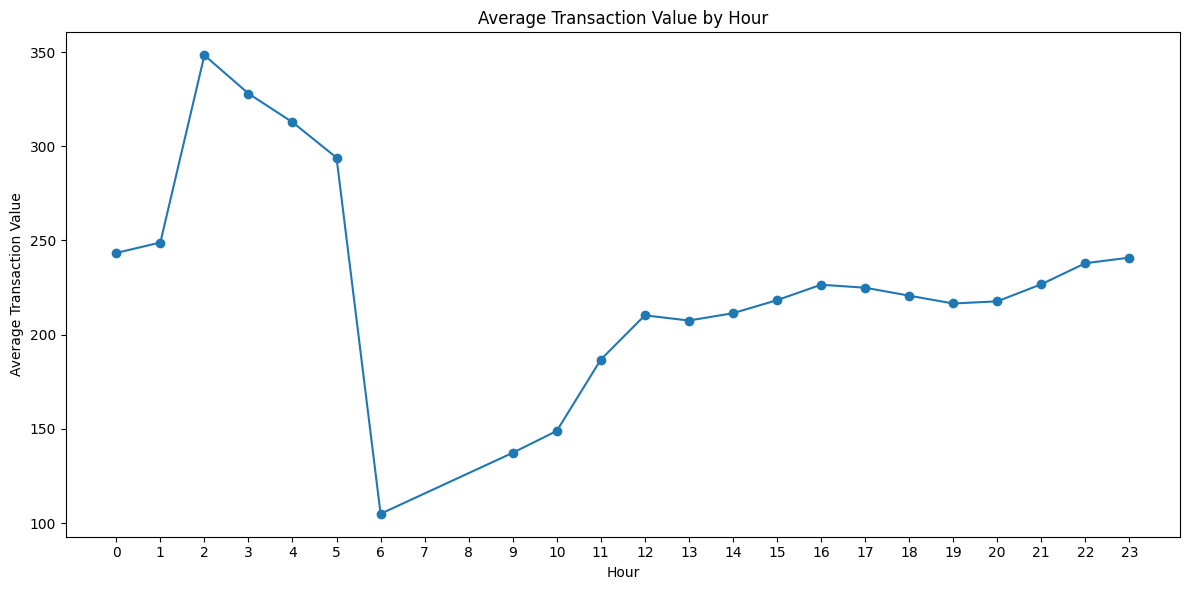

In [13]:
# 6. Customer Behavior
# Average transaction value by hour
avg_transaction_by_hour = df.groupby('Hour')['Total'].mean()
plt.figure(figsize=(12, 6))
avg_transaction_by_hour.plot(kind='line', marker='o')
plt.title('Average Transaction Value by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Transaction Value')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



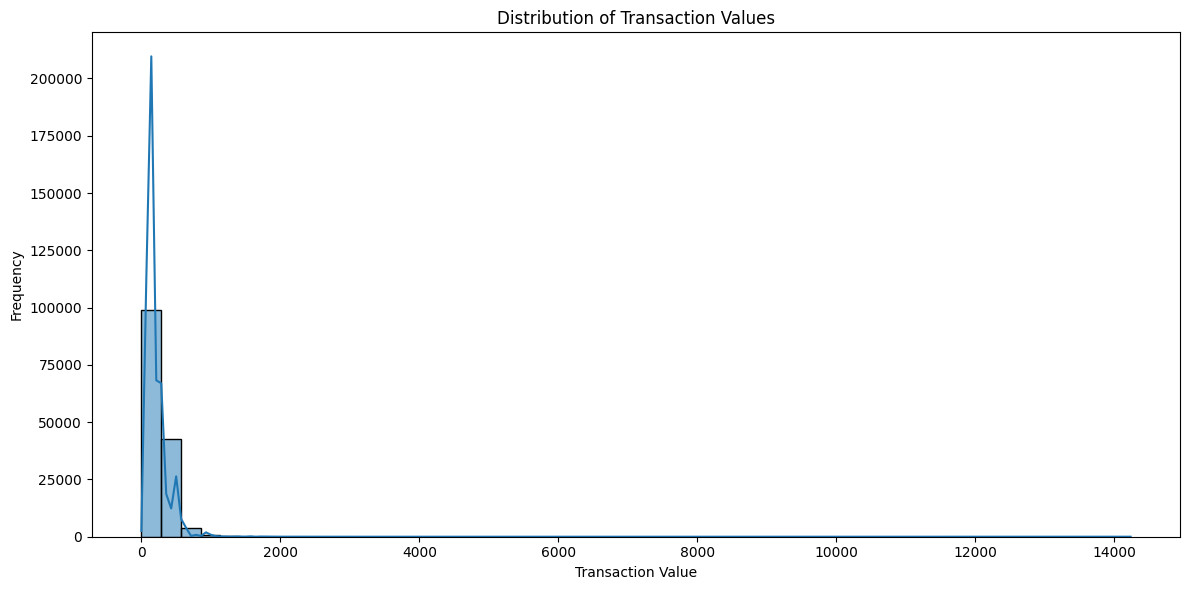

In [14]:
# Distribution of transaction values
plt.figure(figsize=(12, 6))
sns.histplot(df['Total'], kde=True, bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



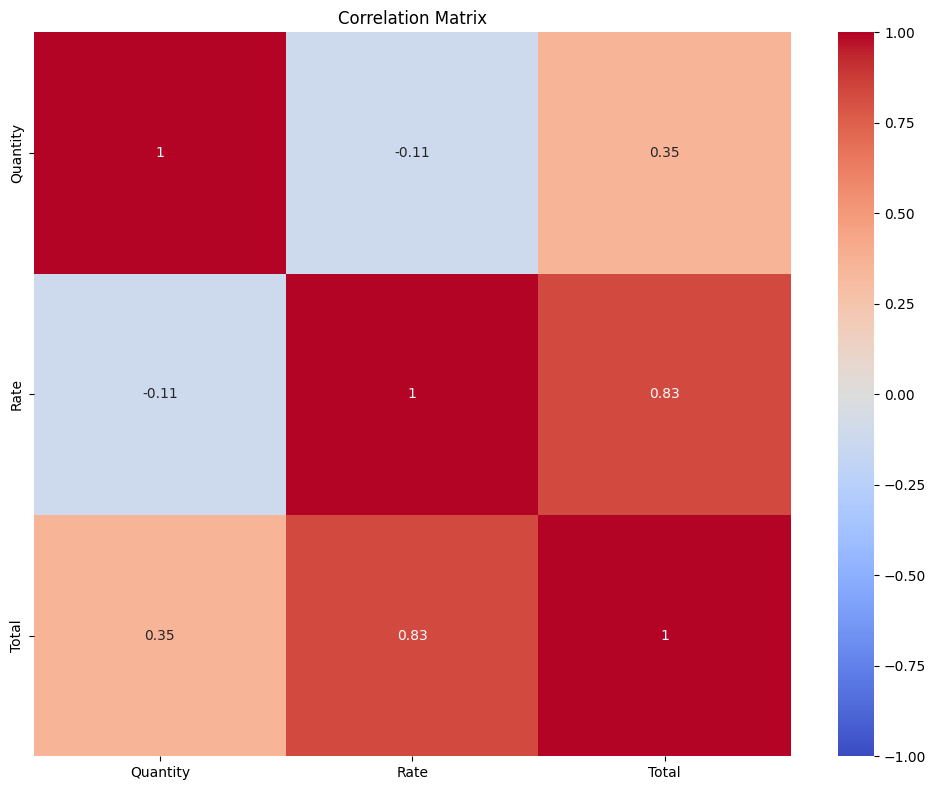

In [15]:
# 7. Correlation Analysis
# Correlation between Quantity, Rate, and Total
correlation_matrix = df[['Quantity', 'Rate', 'Total']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



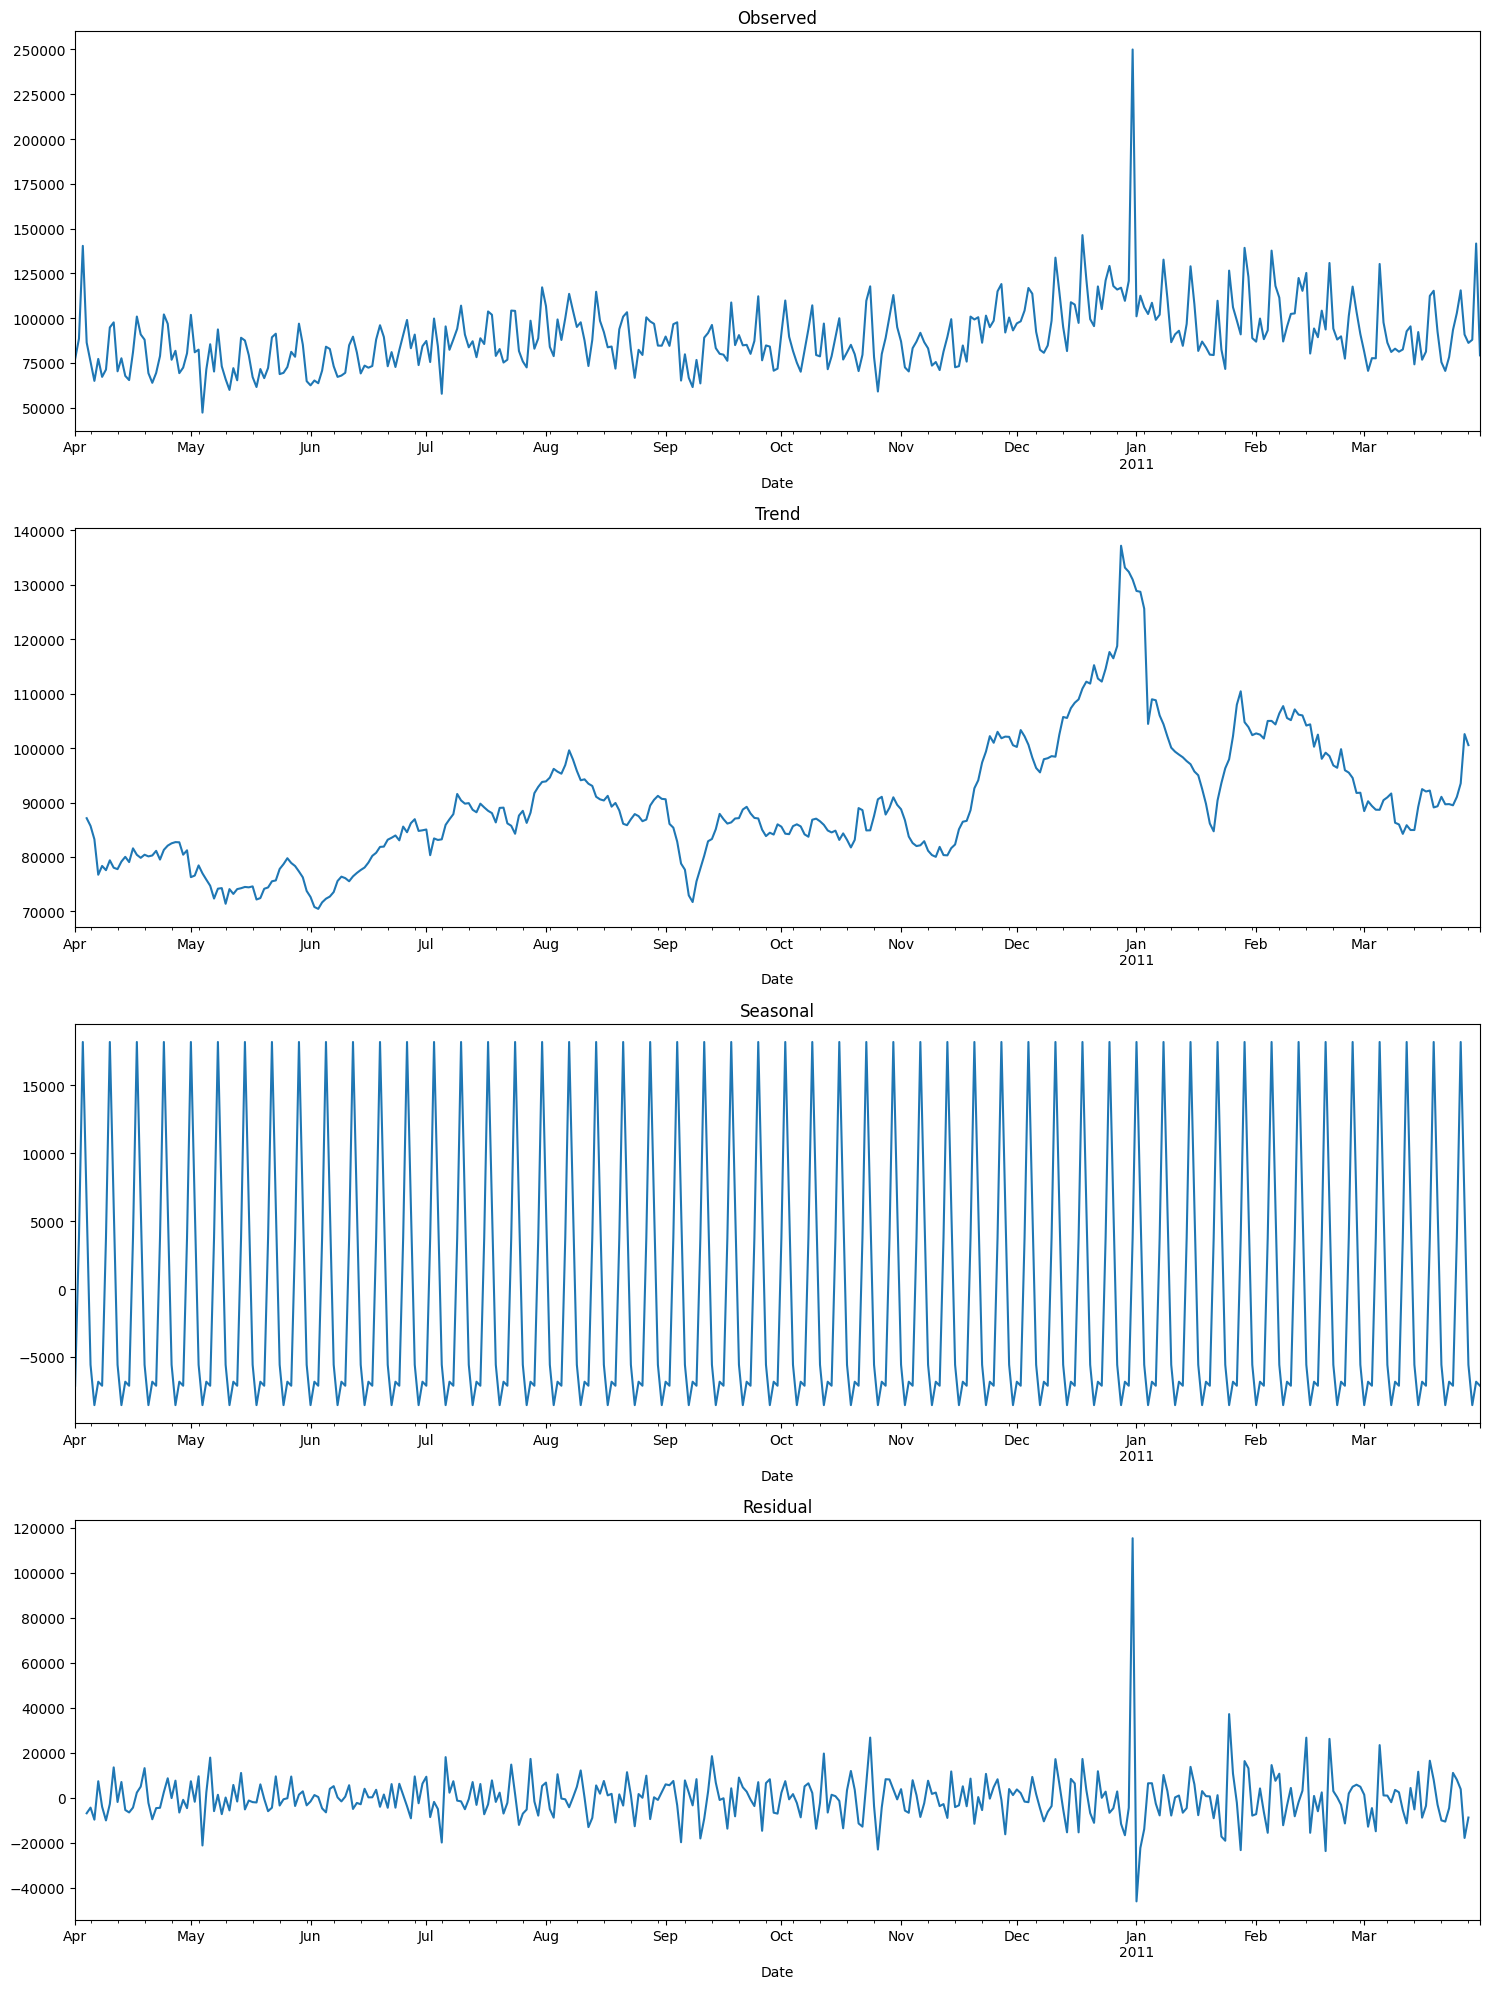

In [16]:
# 8. Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily frequency
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

# Perform time series decomposition
result = seasonal_decompose(daily_sales['Total'], model='additive', period=7)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

In [14]:
df.columns
#remove only the column Bill Number to be without space in name
df = df.rename(columns={'Bill Number ': 'BillNumber'})


In [54]:
df.columns

Index(['Date', 'BillNumber', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category', 'DateTime', 'DayOfWeek', 'Hour',
       'Month'],
      dtype='object')

In [8]:
# Prepare data for market basket analysis
basket = df.groupby(['BillNumber', 'Item Desc'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNumber')

# Convert to binary (1 if item was purchased, 0 otherwise)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Function to generate rules with error handling
def generate_rules(min_support, min_confidence, min_lift):
    try:
        frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
        rules = rules[rules['confidence'] >= min_confidence]
        return rules
    except Exception as e:
        print(f"Error generating rules: {e}")
        return pd.DataFrame()

# Start with low support and gradually increase
min_support = 0.001
min_confidence = 0.5
min_lift = 1

while min_support <= 0.1:
    print(f"\nTrying with min_support={min_support}, min_confidence={min_confidence}, min_lift={min_lift}")
    rules = generate_rules(min_support, min_confidence, min_lift)
    
    if not rules.empty:
        print(f"Found {len(rules)} rules")
        break
    else:
        print("No rules found, increasing support")
        min_support *= 2

if rules.empty:
    print("Unable to find any association rules. The data may not have strong associations.")
else:
    # Sort rules by lift
    rules = rules.sort_values('lift', ascending=False)

    print("\nTop 10 rules by lift:")
    print(rules.head(10))

    # Identify top combos
    top_combos = rules.sort_values('lift', ascending=False).head(5)
    print("\nTop 5 recommended combos:")
    for i, row in top_combos.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"{antecedents} -> {consequents}")
        print(f"Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}\n")

# Additional analysis
print("\nMost frequent individual items:")
item_frequency = basket_sets.sum().sort_values(ascending=False)
print(item_frequency.head(10))

print("\nMost common item pairs:")
from itertools import combinations
item_pairs = []
for _, row in basket_sets.iterrows():
    items = row.index[row == 1].tolist()
    item_pairs.extend(list(combinations(items, 2)))

pair_frequency = pd.Series(item_pairs).value_counts()
print(pair_frequency.head(10))

/var/folders/7j/z4qv0r351n32mrbzw1gf343c0000gn/T/ipykernel_15349/1986444636.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)



Trying with min_support=0.001, min_confidence=0.5, min_lift=1


/opt/homebrew/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Found 1 rules

Top 10 rules by lift:
                         antecedents                       consequents  \
13  (ADD HAZELNUT FLAVOUR          )  (CAFFE LATTE                   )   

    antecedent support  consequent support   support  confidence       lift  \
13            0.002958            0.029936  0.001615    0.545894  18.235195   

    leverage  conviction  zhangs_metric  
13  0.001526    2.136204       0.947965  

Top 5 recommended combos:
ADD HAZELNUT FLAVOUR           -> CAFFE LATTE                   
Support: 0.0016, Confidence: 0.5459, Lift: 18.2352


Most frequent individual items:
Item Desc
NIRVANA HOOKAH SINGLE                   8389
MINT FLAVOUR SINGLE                     5812
CAPPUCCINO                              5468
GREAT LAKES SHAKE                       4871
SAMBUCA                                 4423
POUTINE WITH FRIES                      3414
QUA  MINERAL WATER(1000ML)              3328
CALCUTTA MINT                           3307
JR.CHL AVALANCHE        

In [10]:
print("\nMost common item pairs:")
from itertools import combinations
item_pairs = []
for _, row in basket_sets.iterrows():
    items = row.index[row == 1].tolist()
    item_pairs.extend(list(combinations(items, 2)))

pair_frequency = pd.Series(item_pairs).value_counts()
print(pair_frequency.head(10))


Most common item pairs:
(NIRVANA HOOKAH SINGLE         , POUTINE WITH FRIES            )          443
(CAPPUCCINO                    , MINT FLAVOUR SINGLE           )          419
(CAPPUCCINO                    , GREAT LAKES SHAKE                   )    388
(NIRVANA HOOKAH SINGLE         , QUA  MINERAL WATER(1000ML)    )          383
(GREAT LAKES SHAKE                   , NIRVANA HOOKAH SINGLE         )    359
(NIRVANA HOOKAH SINGLE         , RED BULL ENERGY DRINK         )          342
(B.M.T. PANINI                 , SAMBUCA                       )          328
(QUA  MINERAL WATER(1000ML)    , SAMBUCA                       )          328
(B.M.T. PANINI                 , NIRVANA HOOKAH SINGLE         )          322
(GREAT LAKES SHAKE                   , SAMBUCA                       )    318
Name: count, dtype: int64


In [17]:
df.columns

Index(['Date', 'BillNumber', 'Item Desc', 'Time', 'Quantity', 'Rate', 'Tax',
       'Discount', 'Total', 'Category', 'DateTime', 'DayOfWeek', 'Hour',
       'Month'],
      dtype='object')

In [18]:
# Prepare data for market basket analysis
basket = df.groupby(['BillNumber', 'Item Desc'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNumber')

# Convert to binary (1 if item was purchased, 0 otherwise)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Function to generate rules with error handling
def generate_rules(min_support, min_confidence, min_lift):
    try:
        frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
        rules = rules[rules['confidence'] >= min_confidence]
        return rules
    except Exception as e:
        print(f"Error generating rules: {e}")
        return pd.DataFrame()

# Start with very low support and gradually increase if needed
min_support = 0.001
min_confidence = 0.1  # Lowered from 0.5
min_lift = 1

while min_support <= 0.1:
    print(f"\nTrying with min_support={min_support}, min_confidence={min_confidence}, min_lift={min_lift}")
    rules = generate_rules(min_support, min_confidence, min_lift)
    
    if len(rules) >= 10:
        print(f"Found {len(rules)} rules")
        break
    else:
        print(f"Found only {len(rules)} rules, increasing support")
        min_support *= 1.5  # Increase by 50% instead of doubling

if len(rules) < 10:
    print("Unable to find at least 10 association rules. The data may not have many strong associations.")
else:
    # Sort rules by lift and confidence
    rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

    print("\nTop 10 rules by lift:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

    # Additional analysis
    print("\nMost frequent individual items:")
    item_frequency = basket_sets.sum().sort_values(ascending=False)
    print(item_frequency.head(10))

    print("\nMost common item pairs:")
    from itertools import combinations
    item_pairs = []
    for _, row in basket_sets.iterrows():
        items = row.index[row == 1].tolist()
        item_pairs.extend(list(combinations(items, 2)))

    pair_frequency = pd.Series(item_pairs).value_counts()
    print(pair_frequency.head(10))

/var/folders/7j/z4qv0r351n32mrbzw1gf343c0000gn/T/ipykernel_15349/429985773.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)



Trying with min_support=0.001, min_confidence=0.1, min_lift=1


/opt/homebrew/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Found 49 rules

Top 10 rules by lift:
                          antecedents                             consequents  \
17   (ADD HERB ROAST CHICKEN        )        (LEMON INFUSED CHAR GRILLED VEG)   
16   (LEMON INFUSED CHAR GRILLED VEG)        (ADD HERB ROAST CHICKEN        )   
13   (ADD HAZELNUT FLAVOUR          )        (CAFFE LATTE                   )   
10   (ADD FRIES                     )        (SATAY CHICKEN PANINI          )   
38   (FRENCH FRIES                  )        (B.M.T. PANINI                 )   
4    (ADD FRIES                     )        (COUNTRY ROAST CHICKEN PANINI  )   
15   (ADD HAZELNUT FLAVOUR          )        (CAPPUCCINO                    )   
279  (VANILLA ICECREAM              )  (GREAT LAKES SHAKE                   )   
113  (BUN MASKA & CHAI              )        (MASALA CHAI CUTTING           )   
111  (BLACK CURRANT ICED TEA        )        (LEMON ICED TEA                )   

      support  confidence       lift  
17   0.001043    0.464968  79.3

In [20]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))


                          antecedents                             consequents  \
17   (ADD HERB ROAST CHICKEN        )        (LEMON INFUSED CHAR GRILLED VEG)   
16   (LEMON INFUSED CHAR GRILLED VEG)        (ADD HERB ROAST CHICKEN        )   
13   (ADD HAZELNUT FLAVOUR          )        (CAFFE LATTE                   )   
10   (ADD FRIES                     )        (SATAY CHICKEN PANINI          )   
38   (FRENCH FRIES                  )        (B.M.T. PANINI                 )   
4    (ADD FRIES                     )        (COUNTRY ROAST CHICKEN PANINI  )   
15   (ADD HAZELNUT FLAVOUR          )        (CAPPUCCINO                    )   
279  (VANILLA ICECREAM              )  (GREAT LAKES SHAKE                   )   
113  (BUN MASKA & CHAI              )        (MASALA CHAI CUTTING           )   
111  (BLACK CURRANT ICED TEA        )        (LEMON ICED TEA                )   
0    (ADD FRIES                     )        (B.M.T. PANINI                 )   
82   (COOL CALIFORNICA      

In [23]:
rules.to_csv('rules.csv', index=False)